In [1]:
# bloco com os imports
import numpy as np
# import pandas as pd
import sklearn as sk
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor as mlpr
from sklearn.model_selection import train_test_split as datasplit
# import matplotlib as mp
import matplotlib.pyplot as pp
%matplotlib inline

In [2]:
# definindo a funcao que sera usada como exemplo
def fy(x,flag):
    if (flag == 0):
        y=np.log(np.abs(x))
    elif (flag == 1):
        y=x
    elif (flag == 2):
        y=np.power(x,2)
    elif (flag == 3):
        y=np.sin(x)
    elif (flag == 4):
        y=np.arctan(x)
    else:
        y=0
    return y

In [3]:
# definindo um limite inferior para x
a=-10;
# definindo um limite superior para x
b=10;
# definindo numero de passos
num=300

# definindo um vetor x que vai de a ate b
# x=np.array(range(a,b+1))
x=np.linspace(a,b, num=num)

In [4]:
# definindo um vetor y = f(x) de acordo com o flag

# definindo o flag
flag = 4

# inicializando y com zeros
y=np.zeros_like(x)

# calculando y de acordo com o flag
for i in range(0,len(x)):
    
    y[i]=fy(x[i],flag)


In [5]:
# adicionando um ruido gaussiano (pelo menos assim espero!) a y

# criando um vetor de numeros sorteados na normal 0, 1
err=np.random.default_rng().normal(0, 1, len(y))
# normalizando o erro para que o maior valor corresponda a 5%
err=.05*err/max(np.abs(err))


# criando um vetor y2 com o ruido
y2=y*(1+err)
y2=y + err*np.mean(np.abs(x))
# y2

In [6]:
# buscando os limites dos eixos

# minimo em x
minx = np.floor(min(x))
# maximo em x
maxx = np.ceil(max(x))

# minimo em y
miny = np.floor(min(y))
# maximo em y
maxy = np.ceil(max(y))


In [7]:
# tentando aplicar o metodo Gaussian Process Regressor para estimar os dados
gpr = GaussianProcessRegressor().fit(x.reshape(-1,1),y2.reshape(-1,1))
yest = gpr.predict(x.reshape(-1,1), return_std=False)

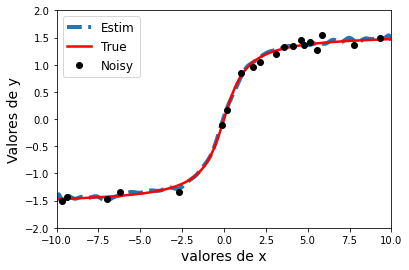

In [8]:
# tentando plotar os dados estimados
fig, ax = pp.subplots()
# titulo do eixo x
ax.set_xlabel('valores de x', fontsize = 14)
# titulo do eixo y
ax.set_ylabel('Valores de y', fontsize = 14)
# limites do eixo x
ax.set_xlim([minx, maxx])
# limites do eixo y
ax.set_ylim([miny, maxy])
# plotando os valores estimados
# ax.plot(dat.x, dat.ln, '-');
ax.plot(x, yest, '--', label = 'Estim', linewidth = 4);

# plotando os valores reais
ax.plot(x, y, 'r-', label = 'True', linewidth = 2.5);

# amostrando parte dos dados com ruido
lixo, xno, lixo2, yno = datasplit(x, y2, test_size=20/num, random_state = 42)
# plotando os valores com ruido
ax.plot(xno, yno, 'ko', label = 'Noisy');

del lixo, lixo2

# incluindo a legenda
# ax.legend('estm.', 'real')
ax.legend(loc="best", fontsize = 12)

In [9]:
# tentando resolver o problema usando regressao linear e aproximacao polinomial
from sklearn.linear_model import LinearRegression as linreg
from sklearn.preprocessing import PolynomialFeatures as polyfeat
from sklearn.pipeline import make_pipeline as pipe
from sklearn.linear_model import Ridge

# selecionando o grau do polinomio que vai aproximar a funcao
deg = 10

# criando o modelo
regr = linreg()
# regr2 = pipe([("polynomial_features", polyfeat),("linear_regression", linreg())])

regr2 = pipe(polyfeat(deg), Ridge(alpha = 1e-3) )


# treinando o modelo
regr.fit(x.reshape(-1,1), y.reshape(-1,1))

regr2.fit(x.reshape(-1,1),y.reshape(-1,1))

# estimando os dados com base no modelo
yreg = regr.predict(x.reshape(-1,1))
yreg2 = regr2.predict(x.reshape(-1,1))


# print(xm.shape)

# print(yreg2)

C:\Users\renan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.84451e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


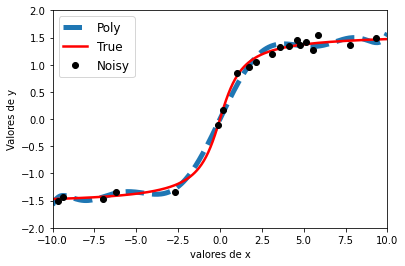

In [10]:
# tentando plotar os dados estimados
fig, ax = pp.subplots()
# titulo do eixo x
ax.set_xlabel('valores de x')
# titulo do eixo y
ax.set_ylabel('Valores de y')
# limites do eixo x
ax.set_xlim([minx, maxx])
# limites do eixo y
ax.set_ylim([miny, maxy])
# plotando os valores estimados
# ax.plot(dat.x, dat.ln, '-');
# ax.plot(x, yreg, 'g*', label = 'Estim', markersize = 10);
ax.plot(x, yreg2, '--', label = 'Poly', linewidth = 5);
# ax.plot(xm[:,1], yreg2, 'g-*', label = 'Poly', linewidth = 5);

# plotando os valores reais
ax.plot(x, y, 'r-', label = 'True', linewidth = 2.5);

# plotando os valores com ruido
ax.plot(xno, yno, 'ko', label = 'Noisy');

# incluindo a legenda
# ax.legend('estm.', 'real')
ax.legend(loc="best", fontsize = 12)

In [11]:
#  tentando montar uma divisao entre dados de entrada e saida
# para isso, vamos determinar um numero de pontos que serao considerados
# entrada na rede para prever o proximo ponto

# numero de pontos de entrada na rede
ent = 5; # esse numero foi escolhido arbitrariamente

# verificando se o numero de entradas e maior que o numero de pontos disponiveis
if ent >= num:
#     se ent > num, forcando que ent = 0.1 num
    ent = int(0.1*num)
# final do if

In [12]:
# criando uma matriz onde cada linha apresenta as ent entradas e depois o valor de saida

cond = 2

# inicializando a matriz com zeros
if cond == 1:
    xm = np.zeros((num-ent, ent+1))
else:
    xm = np.zeros((num-ent, ent))
    

for i in range(num-ent):
    for j in range(0,ent):
        xm[i,j]=x[i+j]
#     final do for do j
    if cond == 1:
        xm[i,ent]=y[i+ent-1];
# final do for do i

# fazendo um slicing no vetor de saida para pegar apenas as num - ent entradas
ym = y2[ent-1:-1]
# ym

In [13]:
# definindo a fracao correspondente aos dados de teste
tsize = 0.2    # valor escolhido arbitrariamente

# separando os dados em treino e teste
xtr, xte, ytr, yte = datasplit(xm, ym, test_size=tsize)

print(xtr.shape, ytr.shape)

(236, 5) (236,)


In [14]:
# definindo o numero de camadas ocultas
nlayers = 200
# definindo a funcao de ativacao (indentity, logistic, tanh ou relu)
act = 'relu'
# definindo o metodo de otimizacao (lbfgs, sgd ou adam)
opt = 'adam'
# definindo o numero maximo de iteracoes (default = 200)
imax = 1000
# definindo a taxa de aprendizagem (default = .001)
lerat = .005
# definindo a fracao de dados de validacao
valf = 0.1

# tentando resolver essa bagaca usando redes neurais
nn = mlpr(early_stopping=True, validation_fraction=valf, learning_rate_init=lerat, 
          activation = act, solver=opt, hidden_layer_sizes = nlayers, max_iter= imax,
         random_state=0).fit(xtr, ytr)

In [15]:
# tentando usar a rede para estimar os dados
ynn = nn.predict(xte)

# verificando o score da rede 
sco = round(nn.score(xte, yte),3)

# verificando a RMSE da rede
rmse = np.linalg.norm(yte - ynn)/np.sqrt(len(ynn))

# exibindo na tela
print('Score: %.3f' %sco)
print('RMSE:  %.3f' %(rmse))

Score: 0.994
RMSE:  0.097


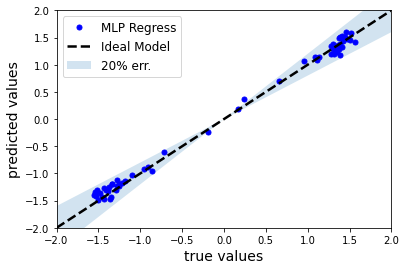

In [16]:
# tentando plotar
yaux = np.linspace(miny, maxy, num = 3)

tol = 0.2

# tentando plotar os dados estimados
fig, ax = pp.subplots()
# titulo do eixo x
ax.set_xlabel('true values', fontsize = 14)
# titulo do eixo y
ax.set_ylabel('predicted values', fontsize = 14)
# limites do eixo x
ax.set_xlim([miny, maxy])
# limites do eixo y
ax.set_ylim([miny, maxy])
# plotando os valores estimados
# ax.plot(dat.x, dat.ln, '-');
ax.plot(yte, ynn, 'bo', label = 'MLP Regress', markersize = 5);
ax.plot(yaux, yaux, 'k--', label = 'Ideal Model', linewidth = 2.5);
# ax.plot(yaux, (1+tol)*yaux, 'g-', linewidth = 0.5);
# ax.plot(yaux, (1-tol)*yaux, 'g-', linewidth = 0.5);
ax.fill_between(yaux, (1+tol)*yaux, (1-tol)*yaux, alpha = 0.2, label = f'{int(100*tol)}% err.')

# incluindo a legenda
ax.legend(loc="best", fontsize = 12)

In [17]:
# usando a rede para estimar alguns dados
dx = x[1] - x[0]

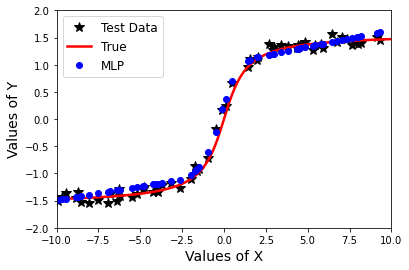

In [18]:
# plotando dado estimado vs dado real vs dado ruidoso
fig, ax = pp.subplots()
# titulo do eixo x
ax.set_xlabel('Values of X', fontsize = 14)
# titulo do eixo y
ax.set_ylabel('Values of Y', fontsize = 14)
# limites do eixo x
ax.set_xlim([minx, maxx])
# limites do eixo y
ax.set_ylim([miny, maxy])

# plotando os valores estimados
# ax.plot(range(0,len(xaux)), xaux, '--', label = 'Ref.', linewidth = 5);
ax.plot(xte[:,0], yte, 'k*', label = 'Test Data', markersize = 10)

# plotando os valores reais
ax.plot(x, y, 'r-', label = 'True', linewidth = 2.5);

# # plotando os valores com ruido
ax.plot(xte[:,0], ynn, 'bo', label = 'MLP');

# incluindo a legenda
ax.legend(loc="best", fontsize = 12)